In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tqdm

import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import *
import keras_cv
from keras import layers
from keras import models

2024-04-01 20:29:10.547316: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-01 20:29:10.745205: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-01 20:29:11.945971: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/alex/salutis/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tq

In [2]:
# Simple model based on the YoloV8 architecture
BATCH_SIZE = 16
EPOCHS = 8

TRAIN_DATADIR = "/home/alex/salutis/data/train"
TEST_DATADIR = "/home/alex/salutis/data/test"
IMAGE_FOLDER = "images"
LABEL_FOLDER = "labels"
IMAGE_SIZE = 640 # height and width of the image

In [3]:
# Load the dataset, images and .txt files(labels) location : data folder
image_dir = os.path.join(TRAIN_DATADIR, IMAGE_FOLDER)
label_dir = os.path.join(TRAIN_DATADIR, LABEL_FOLDER)

images = []
labels = []

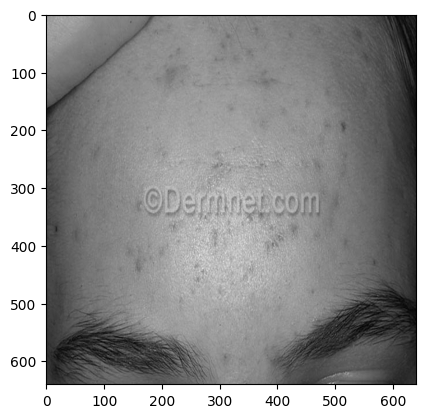

In [4]:
for img in os.listdir(image_dir):
    img_array = cv2.imread(os.path.join(image_dir, img), cv2.IMREAD_GRAYSCALE)
    cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE)) # resize the image to 640x640 (in case it's not already)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break

In [5]:
def parsing_label(label_path):
    with open(label_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            line = line.split()
            #print(line)

for label in os.listdir(label_dir):
    parsing_label(os.path.join(label_dir, label))
    break
    


In [6]:
# Create the dataset

def create_dataset(img_folder, label_folder):
    images = []
    labels = []
    label_file = []
    for img in os.listdir(img_folder):
        img_array = cv2.imread(os.path.join(img_folder, img), cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array, (IMAGE_SIZE, IMAGE_SIZE))
        images.append(img_array)
        label_path = os.path.join(label_folder, img.split(".jpg")[0] + ".txt")
        if not os.path.exists(label_path):
            print(f"Label {label} not found")
            continue
        with open(label_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                line = line.split()
                label_file.append(line)
            labels.append(label_file)
    return images, labels

In [7]:
# Load the dataset

images, labels = create_dataset(image_dir, label_dir)

[['0', '0.33828125', '0.175', '0.0953125', '0.096875'], ['0', '0.5921875', '0.1734375', '0.0765625', '0.059375'], ['0', '0.61640625', '0.61875', '0.05625', '0.071875'], ['0', '0.66484375', '0.58515625', '0.046875', '0.0609375'], ['0', '0.45546875', '0.61328125', '0.03125', '0.096875'], ['0', '0.2390625', '0.6625', '0.05625', '0.0875'], ['0', '0.253125', '0.5203125', '0.034375', '0.0625'], ['0', '0.0296875', '0.58046875', '0.040625', '0.06875'], ['0', '0.4140625', '0.70078125', '0.040625', '0.075'], ['0', '0.61328125', '0.921875', '0.0484375', '0.071875'], ['0', '0.48359375', '0.925', '0.040625', '0.06875'], ['0', '0.475', '0.415625', '0.059375', '0.0640625'], ['0', '0.27890625', '0.5765625', '0.06015625', '0.10703125'], ['0', '0.4390625', '0.25234375', '0.06015625', '0.0953125'], ['0', '0.7828125', '0.9265625', '0.065625', '0.10234375'], ['0', '0.50078125', '0.81796875', '0.04921875', '0.0890625'], ['0', '0.5640625', '0.73359375', '0.05', '0.08828125'], ['0', '0.56484375', '0.55859375'

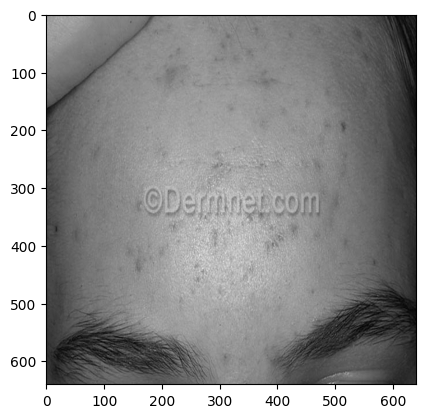

In [8]:
# Print the first image and its label
plt.imshow(images[0], cmap="gray")
print(labels[0]) # print the label of the first image

In [9]:
# Create the model

def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    return model

model = create_model()
model.summary()

# Compile the model

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(images, labels, epochs=EPOCHS, batch_size=BATCH_SIZE)
model.save("model.h5")


/home/alex/salutis/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 638, 638, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 319, 319, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 317, 317, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 158, 158, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 156, 156, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1557504)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    99,680,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,736,714 (380.47 MB)

 Trainable params: 99,736,714 (380.47 MB)

 Non-trainable params: 0 (0.00 B)